<a href="https://colab.research.google.com/github/CristianS1988/ENSAYOGIT/blob/main/Cultivocafe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rasterio tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 20.9 MB/s eta 0:00:00


In [6]:
!apt-get install -y gdal-bin
!pip install rasterio


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-gdal python3-numpy
Suggested packages:
  libgdal-grass python-numpy-doc python3-pytest
The following NEW packages will be installed:
  gdal-bin python3-gdal python3-numpy
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 5,055 kB of archives.
After this operation, 25.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-numpy amd64 1:1.21.5-1ubuntu22.04.1 [3,467 kB]
Get:2 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 python3-gdal amd64 3.6.4+dfsg-1~jammy0 [1,027 kB]
Get:3 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 gdal-bin amd64 3.6.4+dfsg-1~jammy0 [561 kB]
Fetched 5,055 kB in 1s (3,827 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 121918 files and direc

In [11]:
!gdal_translate -of GTiff -co "COMPRESS=LZW" /content/TC_Decomp.tif /content/TC_Decomp_converted.tif


Warning 1: /content/TC_Decomp.tif: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Input file size is 5154, 7476
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
0..ERROR 1: TIFFReadEncodedStrip:Read error at scanline 4294967295; got 72026117 bytes, expected 154125216
ERROR 1: TIFFReadEncodedStrip() failed.
ERROR 1: /content/TC_Decomp.tif, band 2: IReadBlock failed at X offset 0, Y offset 0: TIFFReadEncodedStrip() failed.


In [12]:
!apt-get install -y gdal-bin
!pip install rasterio


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
gdal-bin is already the newest version (3.6.4+dfsg-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [16]:
!gdal_translate -of GTiff -co "COMPRESS=LZW" /content/TC_Decomp.tif /content/TC_Decomp_converted.tif

# Verificar que el archivo se haya creado correctamente
import os
print("Archivos en el directorio /content:")
print(os.listdir("/content"))


Warning 1: /content/TC_Decomp.tif: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Input file size is 5154, 7476
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
0...10...20...30...40...50...60...70...80...90...100 - done.
Archivos en el directorio /content:
['.config', 'TC_Decomp_converted.tif', 'TC_Decomp.tif', 'sample_data']


In [17]:
import os
print("Archivos en el directorio /content:")
print(os.listdir("/content"))

Archivos en el directorio /content:
['.config', 'TC_Decomp_converted.tif', 'TC_Decomp.tif', 'sample_data']


In [42]:
import rasterio
import numpy as np

# Ruta al archivo GeoTIFF convertido
tiff_path = '/content/TC_Decomp_converted.tif'

def load_combined_image(path):
    with rasterio.open(path) as src:
        band1 = src.read(1)
        band2 = src.read(2)
        band3 = src.read(3)
        meta = src.meta
    return np.stack([band1, band2, band3], axis=0), meta

# Cargar las imágenes combinadas
data, meta = load_combined_image(tiff_path)
print("Data shape:", data.shape)  # Debería mostrar (3, filas, columnas)

# Separar las bandas
entropy = data[0]
alpha = data[1]
anisotropy = data[2]

# Manejar valores NaN reemplazándolos con ceros
entropy = np.nan_to_num(entropy)
alpha = np.nan_to_num(alpha)
anisotropy = np.nan_to_num(anisotropy)

# Crear un stack de las bandas
stack = np.stack([entropy, alpha, anisotropy], axis=-1)
print("Stack shape:", stack.shape)

# Normalizar las bandas entre 0 y 1
stack = (stack - stack.min()) / (stack.max() - stack.min())

# Verificar la normalización
print("Stack min value:", stack.min())
print("Stack max value:", stack.max())



Data shape: (3, 7476, 5154)
Stack shape: (7476, 5154, 3)
Stack min value: 0.0
Stack max value: 1.0


In [43]:
# Definir el número de muestras y el tamaño de los bloques de datos de entrenamiento
block_size = 100  # Tamaño de cada bloque (height, width)

# Crear datos de entrenamiento
X_train = []
y_train = []

# Iterar sobre el stack para extraer bloques
for i in range(0, stack.shape[0] - block_size + 1, block_size):
    for j in range(0, stack.shape[1] - block_size + 1, block_size):
        x_block = stack[i:i + block_size, j:j + block_size, :]
        X_train.append(x_block)
        y_train.append(np.random.randint(0, 2))  # Etiquetas ficticias, debes usar tus etiquetas reales

# Convertir a arrays de numpy y ajustar las formas
X_train = np.array(X_train)
y_train = np.array(y_train)

# Asegurarse de que las dimensiones sean correctas
print("Training data shape:", X_train.shape)  # Debería ser (n_samples, block_size, block_size, 3)
print("Training labels shape:", y_train.shape)  # Debería ser (n_samples,)


Training data shape: (3774, 100, 100, 3)
Training labels shape: (3774,)


In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Definir el modelo de CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(block_size, block_size, 3)),  # Ajusta el input_shape según tus datos
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Ajusta el número de neuronas según tus clases
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=8)


Epoch 1/10
472/472 [==============================] - 73s 152ms/step - loss: 0.6939 - accuracy: 0.4976
Epoch 2/10
472/472 [==============================] - 72s 152ms/step - loss: 0.6931 - accuracy: 0.5082
Epoch 3/10
472/472 [==============================] - 71s 151ms/step - loss: 0.6931 - accuracy: 0.5082
Epoch 4/10
472/472 [==============================] - 71s 152ms/step - loss: 0.6931 - accuracy: 0.5082
Epoch 5/10
472/472 [==============================] - 71s 151ms/step - loss: 0.6931 - accuracy: 0.5082
Epoch 6/10
472/472 [==============================] - 71s 151ms/step - loss: 0.6931 - accuracy: 0.5082
Epoch 7/10
472/472 [==============================] - 70s 149ms/step - loss: 0.6931 - accuracy: 0.5082
Epoch 8/10
472/472 [==============================] - 71s 151ms/step - loss: 0.6931 - accuracy: 0.5082
Epoch 9/10
472/472 [==============================] - 70s 148ms/step - loss: 0.6931 - accuracy: 0.5082
Epoch 10/10
472/472 [==============================] - 70s 149ms/step - l

1/1 [==============================] - 0s 31ms/step
Classified image shape: (74, 51)


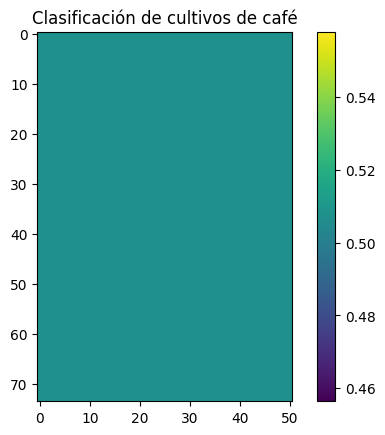

In [45]:
# Predecir las clases para cada bloque
predictions = []
for i in range(0, stack.shape[0] - block_size + 1, block_size):
    row_predictions = []
    for j in range(0, stack.shape[1] - block_size + 1, block_size):
        x_block = stack[i:i + block_size, j:j + block_size, :]
        x_block = x_block.reshape((1, block_size, block_size, 3))
        pred = model.predict(x_block)
        row_predictions.append(pred[0, 0])
    predictions.append(row_predictions)

classified_image = np.array(predictions)
print("Classified image shape:", classified_image.shape)

# Mostrar la imagen clasificada
import matplotlib.pyplot as plt

plt.imshow(classified_image, cmap='viridis')
plt.colorbar()
plt.title('Clasificación de cultivos de café')
plt.show()

# Guardar la imagen clasificada en Colab
import rasterio

classified_meta = meta.copy()
classified_meta.update({'count': 1})

classified_image_path = '/content/classified_image.tif'

with rasterio.open(classified_image_path, 'w', **classified_meta) as dst:
    dst.write(classified_image, 1)
